<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/AB_Testing_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

# Read in the data
click_data <- read_csv("click_data.csv")

# Calculate the mean conversion rate by day of the week
click_data %>%
  group_by(wday(visit_date)) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

In [ ]:
# Read in the data
click_data <- read_csv("click_data.csv")

# Calculate the mean conversion rate by week of the year
click_data %>%
  group_by(week(visit_date)) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

In [ ]:
# Compute conversion rate by week of the year
click_data_sum <- click_data %>%
  group_by(week(visit_date)) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

# Build plot
ggplot(click_data_sum, aes(x = `week(visit_date)`,
                           y = conversion_rate)) +
  geom_point() +
  geom_line() +
  scale_y_continuous(limits = c(0, 1),
                     labels = percent)

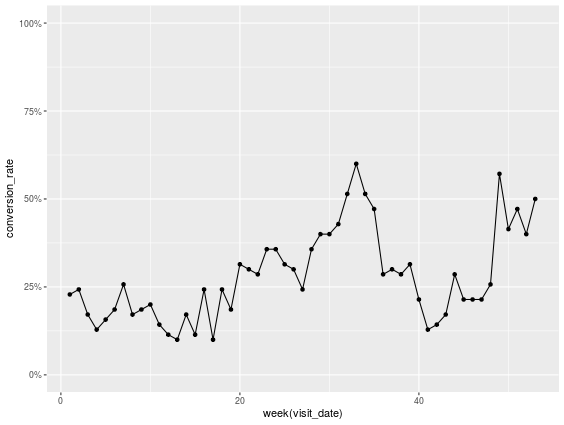


In [ ]:
# Load powerMediation
library(powerMediation)

# Compute and look at sample size for experiment in August
total_sample_size <- SSizeLogisticBin(p1 = 0.54,
                                      p2 = 0.64,
                                      B = 0.5,
                                      alpha = 0.05,
                                      power = 0.8)
total_sample_size

In [ ]:
# Load powerMediation
library(powerMediation)

# Compute and look at sample size for experiment in August with a 5 percentage point increase
total_sample_size <- SSizeLogisticBin(p1 = 0.54,
                                      p2 = 0.59,
                                      B = 0.5,
                                      alpha = 0.05,
                                      power = 0.8)
total_sample_size

In [ ]:
# Group and summarize data
experiment_data_clean_sum <- experiment_data_clean %>%
  group_by(visit_date, condition) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

# Make plot of conversion rates over time
ggplot(experiment_data_clean_sum,
       aes(x = visit_date,
           y = conversion_rate,
           color = condition,
           group = condition)) +
  geom_point() +
  geom_line()

In [ ]:
# Load package for cleaning model results
library(broom)

# View summary of results
experiment_data_clean %>%
  group_by(condition) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

# Run logistic regression
experiment_results <- glm(clicked_adopt_today ~ condition,
                          family = "binomial",
                          data = experiment_data_clean) %>%
  tidy()
experiment_results

In [ ]:
# Load package for running power analysis
library(powerMediation)

# Run logistic regression power analysis
total_sample_size <- SSizeLogisticBin(p1 = 0.39,
                                      p2 = 0.59,
                                      B = 0.5,
                                      alpha = 0.05,
                                      power = 0.8)
total_sample_size

In [ ]:
# Read in data for follow-up experiment
followup_experiment_data <- read_csv("followup_experiment_data.csv")

# View conversion rates by condition
followup_experiment_data %>%
  group_by(condition) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

# Run logistic regression
followup_experiment_results <- glm(clicked_adopt_today ~ condition,
                                   family = "binomial",
                                   data = followup_experiment_data) %>%
  tidy()
followup_experiment_results

In [ ]:
# Plot monthly summary
ggplot(eight_month_checkin_data_sum,
       aes(x = month_text,
           y = conversion_rate,
           color = condition,
           group = condition)) +
  geom_point(size = 4) +
  geom_line(lwd = 1) +
  scale_y_continuous(limits = c(0, 1),
                     labels = percent) +
  labs(x = "Month",
       y = "Conversion Rate")

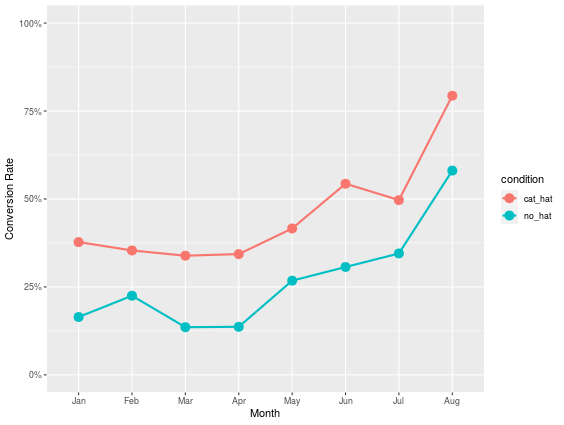

In [ ]:
# Load package for power analysis
library(powerMediation)

# Run power analysis for logistic regression
total_sample_size <- SSizeLogisticBin(p1 = 0.49,
                                      p2 = 0.64,
                                      B = 0.5,
                                      alpha = 0.05,
                                      power = 0.8)
total_sample_size

In [ ]:
# Load package to clean up model outputs
library(broom)

# View summary of data
followup_experiment_data_sep %>%
  group_by(condition) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

# Run logistic regression
followup_experiment_sep_results <- glm(clicked_adopt_today ~ condition,
                                       family = "binomial",
                                       data = followup_experiment_data_sep) %>%
  tidy()
followup_experiment_sep_results

In [ ]:
# Compute conversion rates for A/A experiment
viz_website_2018_01_sum <- viz_website_2018_01 %>%
  group_by(condition) %>%
  summarize(like_conversion_rate = mean(clicked_like))
viz_website_2018_01_sum

# Plot conversion rates for two conditions
ggplot(viz_website_2018_01_sum,
       aes(x = condition, y = like_conversion_rate)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(limits = c(0, 1), labels = percent)

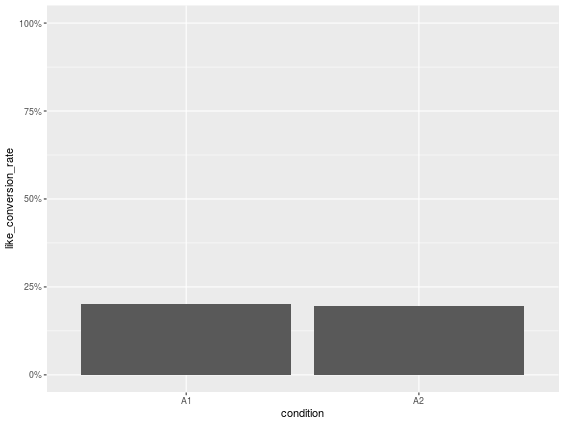

In [ ]:
# Load library to clean up model outputs
library(broom)

# Run logistic regression
aa_experiment_results <- glm(clicked_like ~ condition,
                             family = "binomial",
                             data = viz_website_2018_01) %>%
  tidy()
aa_experiment_results

In [ ]:
# Plot 'like' conversion rates by date for experiment
ggplot(viz_website_2018_02_sum,
       aes(x = visit_date,
           y = like_conversion_rate,
           color = condition,
           linetype = article_published,
           group = interaction(condition, article_published))) +
  geom_point() +
  geom_line() +
  geom_vline(xintercept = as.numeric(as.Date("2018-02-15"))) +
  scale_y_continuous(limits = c(0, 0.3), labels = percent)

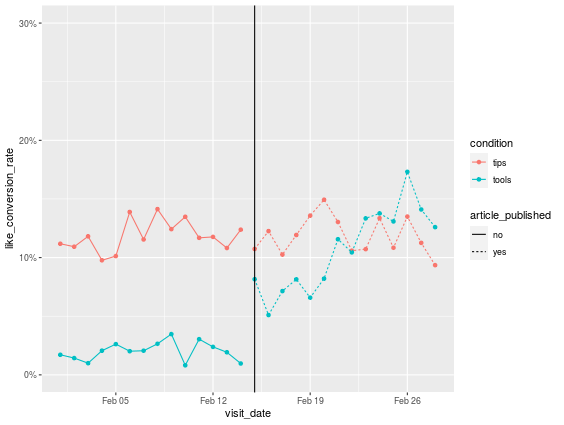

In [ ]:
# Compute 'like' conversion rate and mean pageload time by day
viz_website_2018_03_sum <- viz_website_2018_03 %>%
  group_by(visit_date, condition) %>%
  summarize(mean_pageload_time = mean(pageload_time),
            like_conversion_rate = mean(clicked_like))

# Plot effect of 'like' conversion rate by pageload time
ggplot(viz_website_2018_03_sum,
       aes(x = mean_pageload_time, y = like_conversion_rate, color = condition)) +
  geom_point()

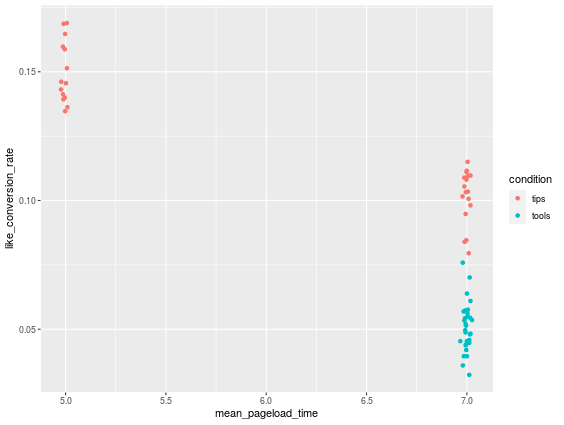

In [ ]:
# Plot 'like' conversion rate by day
ggplot(viz_website_2018_03_sum,
       aes(x = visit_date,
           y = like_conversion_rate,
           color = condition,
           linetype = pageload_delay_added,
           group = interaction(condition, pageload_delay_added))) +
  geom_point() +
  geom_line() +
  geom_vline(xintercept = as.numeric(as.Date("2018-03-15"))) +
  scale_y_continuous(limits = c(0, 0.3), labels = percent)

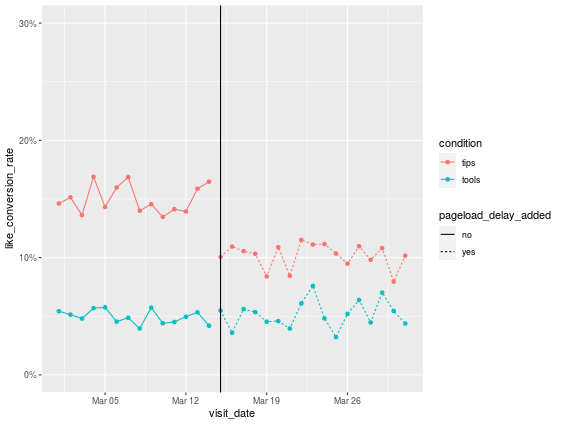

In [ ]:
# Load package to run power analysis
library(powerMediation)

# Run power analysis for logistic regression
total_sample_size <- SSizeLogisticBin(p1 = 0.17,
                                      p2 = 0.27,
                                      B = 0.5,
                                      alpha = 0.05,
                                      power = 0.8)
total_sample_size

In [ ]:
# Load package to run power analysis
library(pwr)

# Run power analysis for t-test
sample_size <- pwr.t.test(d = 0.3,
                          sig.level = 0.05,
                          power = 0.8)
sample_size